In [1]:
import os, uuid
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__

In [2]:
try:
    print("Azure Blob Storage v" + __version__ + " - Python quickstart sample")
except Exception as ex:
    print('Exception:')
    print(ex)

Azure Blob Storage v12.8.0 - Python quickstart sample


In [6]:
azure_conn_str='DefaultEndpointsProtocol=https;AccountName=forestcoverclass;AccountKey=opC1RsZQ5O3bOYRoVPehd6ghJ+vyneY8QpcXbpDOd15r4FICnBBSMT6o45txXveLUCql7DfD2TeDVwJx8jQzzg==;EndpointSuffix=core.windows.net'

In [7]:
connect_str = os.getenv('AZURE_STORAGE_CONNECTION_STRING')

In [8]:
connect_str

In [60]:
# Create the BlobServiceClient object which will be used to create a container client
blob_service_client = BlobServiceClient.from_connection_string(azure_conn_str)

# Create a unique name for the container
container_name = str(uuid.uuid4())

# Create the container
container_client = blob_service_client.create_container(container_name)

In [37]:
blob_service_client = BlobServiceClient.from_connection_string(azure_conn_str)

In [61]:
container_client

In [62]:
blob_service_client.list_containers()

<iterator object azure.core.paging.ItemPaged at 0x118cc820>

In [63]:
for x in blob_service_client.list_containers():
    print(x['name'])

7fae3a05-8583-45a2-93d4-d51f85786279
98964315-b4bb-4217-917f-91725d4d0d68
targetdirectory


In [20]:
from azure.storage.blob import PublicAccess

In [22]:
file_list=os.listdir('Training_Batch_Files')

In [23]:
file_n=file_list[0]

In [24]:
file_n

'forest_co8011998_120218.csv'

In [64]:
for file_n in file_list:
    with open(os.path.join('Training_Batch_Files',file_n), "rb") as data:
        blob_client = container_client.upload_blob(name=file_n, data=data)

In [27]:
blob_client = container_client.get_blob_client("sampleblob")

In [29]:
blob_client.delete_blob()

In [31]:
account_name=blob_service_client.account_name

In [32]:
source_directory='7fae3a05-8583-45a2-93d4-d51f85786279'

In [33]:
file_name='forest_co8011998_120218.csv'

In [34]:
source_blob = (f"https://{account_name}.blob.core.windows.net/{source_directory}/{file_name}")

In [35]:
source_blob

'https://forestcoverclass.blob.core.windows.net/7fae3a05-8583-45a2-93d4-d51f85786279/forest_co8011998_120218.csv'

In [41]:
container_client

In [43]:
copied_blob  = blob_service_client.get_blob_client('targetdirectory','forest_co8011998_120218.csv')

In [44]:
copied_blob.start_copy_from_url(source_blob)

{'etag': '"0x8D8E56D51BCF4BA"',
 'last_modified': datetime.datetime(2021, 3, 12, 15, 41, 35, tzinfo=datetime.timezone.utc),
 'client_request_id': '6d538f0a-8349-11eb-b0ad-bce92fcc494d',
 'request_id': 'c4c81a4b-101e-003b-2c56-179425000000',
 'version': '2020-06-12',
 'version_id': None,
 'date': datetime.datetime(2021, 3, 12, 15, 41, 35, tzinfo=datetime.timezone.utc),
 'copy_id': '01f58384-3ec4-4bf2-b8a4-472ea4d55047',
 'copy_status': 'success'}

In [45]:
import pandas as pd
import io

In [46]:
csv_buffer = io.StringIO()

In [48]:
master_list=[['a','b'],[1,2]]

In [49]:
df=pd.DataFrame(master_list,columns=['col1','col2'])

In [50]:
df

col1 col2
0    a    b
1    1    2

In [51]:
df.to_csv(csv_buffer,index=False)

In [54]:
csv_buffer.getvalue()

'col1,col2\r\na,b\r\n1,2\r\n'

In [65]:
container_client.upload_blob(name='sample.csv',data=csv_buffer.getvalue())

In [66]:
blob_client

In [70]:
blobstring = container_client.download_blob('forest_co8011998_120218.csv')

In [71]:
pd.read_csv(io.StringIO(blobstring.content_as_text()))

elevation  aspect  slope  horizontal_distance_to_hydrology  \
0           2424     113     16                               268   
1           3130      40     15                               330   
2           3071      62      5                               212   
3           3151       9     17                                95   
4           3139      74      3                               283   
...          ...     ...    ...                               ...   
9996        2913     173     17                               210   
9997        2928     349     14                                 0   
9998        3329     165     13                               997   
9999        3135     111     20                               649   
10000       2834       0     12                                30   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  68                              808   
1                                  24                             2279   
2                                  40                             1321   
3                                  19                              577   
4                                   9                             2522   
...                               ...                              ...   
9996                               58                              511   
9997                                0                             1165   
9998                              213                             2584   
9999                              -59                              582   
10000                               3                             4559   

       Horizontal_Distance_To_Fire_Points  wilderness_area1  wilderness_area2  \
0                                    1260                 0                 0   
1                                    1650                 0                 0   
2                                    2697                 1                 0   
3                                    2029                 0                 1   
4                                    1463                 1                 0   
...                                   ...               ...               ...   
9996                                 1040                 0                 0   
9997                                 2287                 0                 0   
9998                                 2242                 0                 0   
9999                                 1116                 0                 1   
10000                                4788                 1                 0   

       wilderness_area3  ...  soil_type_32  soil_type_33  soil_type_34  \
0                     0  ...             0             0             0   
1                     1  ...             1             0             0   
2                     0  ...             0             0             0   
3                     0  ...             0             0             0   
4                     0  ...             0             0             0   
...                 ...  ...           ...           ...           ...   
9996                  1  ...             0             0             0   
9997                  1  ...             1             0             0   
9998                  1  ...             0             1             0   
9999                  0  ...             0             0             0   
10000                 0  ...             0             0             0   

       soil_type_35  soil_type_36  soil_type_37  soil_type_38  soil_type_39  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                 0             

In [73]:
blob_service_client.delete_container('98964315-b4bb-4217-917f-91725d4d0d68')

In [77]:
blob_service_client.create_container('trainbatchfiles')

In [78]:
sample_client=blob_service_client.get_container_client('trainbatchfiles')

In [81]:
sample_client.upload_blob(name='sample1.csv',data=csv_buffer1.getvalue())

NameError: name 'csv_buffer1' is not defined

In [85]:
[x.name for x in sample_client.list_blobs()]

['sample.csv', 'sample1.csv']

In [86]:
sample_client.delete_blob('sample.csv')

In [87]:
import pickle

In [91]:
f=open(os.path.join('models','KMeans','KMeans.sav'),'rb')
obj1=pickle.load(f)

c:\users\garahul\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [92]:
obj1.labels_

array([0, 1, 1, ..., 2, 1, 1])

In [96]:
import dill

In [97]:
sample_client.upload_blob(name='KMeans.sav',data=dill.dumps(obj1))

In [98]:
blobstring = sample_client.download_blob('KMeans.sav')

In [99]:
model=dill.loads(blobstring.readall())

In [100]:
model.labels_

array([0, 1, 1, ..., 2, 1, 1])

In [101]:
sample_client.account_name

'forestcoverclass'

In [171]:
import os
import io
import dill
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
from application_logging.logger import App_Logger
import pandas as pd

class AzureBlobStorage:
    def __init__(self):
        self.conn_str='DefaultEndpointsProtocol=https;AccountName=forestcoverclass;AccountKey=opC1RsZQ5O3bOYRoVPehd6ghJ+vyneY8QpcXbpDOd15r4FICnBBSMT6o45txXveLUCql7DfD2TeDVwJx8jQzzg==;EndpointSuffix=core.windows.net'
        self.logger = App_Logger()
        self.azure_client = BlobServiceClient.from_connection_string(self.conn_str)
        self.file = 'AzureManagementLogs'


    def listDirFiles(self,folder_name):
        """
        Method: listDirFiles
        Description: List all the files in a directory.
        :param folder_name: Folder Name
        :return: List of files.
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            container_client = self.azure_client.get_container_client(folder_name)
            return [x.name for x in container_client.list_blobs()]
        except Exception as e:
            message = 'Exception Found: Function => listDirFiles, Folder Name: ' + folder_name
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e


    def isFolderPresent(self,folder_name):
        """
        Method: isFolderPresent
        Description: Check if the given folder is present on Azure
        :param folder_name: Folder to be checked for presence.
        :return: True if Present else False
        """
        try:
            folder_name = folder_name.replace('_','-').lower().strip()
            folder_list = [f.name for f in self.azure_client.list_containers()]
            print(folder_list)
            if folder_name in folder_list:
                print('Folder is present')
                return True
            else:
                return False
        except Exception as e:
            message = 'Exception Found: Function => isFolderPresent, Folder Name: ' + folder_name
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e


    def deleteFolder(self,folder_name):
        """
        Method: deleteFolder
        Description: Enables user to delete a user.
        :param folder_name: Folder to be delted
        :return: None
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            if self.isFolderPresent(folder_name):
                self.azure_client.delete_container(folder_name)
        except Exception as e:
            message = 'Exception Found: Function => deleteFolder, Folder Name: ' + folder_name
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e

    def isFilePresent(self,folder_name,file_name):
        """
        Method: isFilePresent
        Description: Check if given file is present in provided folder.
        :param folder_name: Folder Name where file should be present.
        :param file_name: File Name to search.
        :return: True if File Present else False
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            if file_name in self.listDirFiles(folder_name):
                return True
            else:
                return False
        except Exception as e:
            message = 'Exception Found: Function => createFolder, Folder Name: ' + folder_name + ', File Name: ' + file_name
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e


    def deleteFile(self,folder_name,file_name=''):
        """
        Method: deleteFile
        Description: Enables user to Delete the given file.
        :param folder_name: Folder name where file to be present.
        :param file_name: File to be deleted.
        :return: None
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            if self.isFolderPresent(folder_name):
                file_names = self.listDirFiles(folder_name)
                print('File Names: ', file_names)
                if file_name == '':
                    for file_n in file_names:
                        blob_client = self.azure_client.get_blob_client(folder_name, file_n)
                        blob_client.delete_blob()
                else:
                    if file_name in file_names:
                        print('File Found: ', file_name)
                        blob_client = self.azure_client.get_blob_client(folder_name, file_name)
                        blob_client.delete_blob()
        except Exception as e:
            message = 'Exception Found: Function => deleteFile, Folder Name: ' + folder_name + ', File Name: ' + file_name
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e


    def createFolder(self,folder_name):
        """
        Method: createFolder
        Description: Enables user to create a folder/directory on Azure.
        :param folder_name: Folder Name to be created
        :return: None
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            if self.isFolderPresent(folder_name):
                self.deleteFolder(folder_name)
            else:
                self.azure_client.create_container(folder_name)
        except Exception as e:
            message = 'Exception Found: Function => createFolder, Folder Name: ' + folder_name
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e


    def uploadFiles(self,source_dir,dest_dir,file_name=''):
        """
        Method: uploadFiles
        Description: Upload files from local to azure.
        :param source_dir: Folder on local PC
        :param dest_dir: Folder on Azure where files to be uploaded
        :param file_name: Files to be uploaded.
        :return: None
        """
        try:
            dest_dir = dest_dir.replace('_', '-').lower().strip()
            print('Dest Dir: ',dest_dir)
            if not self.isFolderPresent(dest_dir):
                self.createFolder(dest_dir)

            container_client = self.azure_client.get_container_client(dest_dir)
            if file_name=='':
                for file_n in os.listdir(source_dir):
                    self.deleteFile(dest_dir,file_n)
                    with open(os.path.join(source_dir, file_n), "rb") as data:
                        blob_client = container_client.upload_blob(name=file_n, data=data)
            else:
                self.deleteFile(dest_dir,file_name)
                with open(os.path.join(source_dir, file_name), "rb") as data:
                    blob_client = container_client.upload_blob(name=file_name, data=data)
        except Exception as e:
            message = 'Exception Found: Function => uploadFiles, Source Dir: ' + source_dir + ', Dest Dir: ' + dest_dir
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e


    def csvToDataframe(self, folder_name, file_name=''):
        """
        Method: csvToDataframe
        Description: Enables user to get csv files from Azure and load to a dataframe.
        :param folder_name: Folder to be looked for csv file
        :param file_name: Files to be loaded
        :return: Dataframe
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            container_client = self.azure_client.get_container_client(folder_name)
            if file_name == '':
                request_files = self.listDirFiles(folder_name)
                cnt=0
                for file in request_files:
                    if '.csv' in file:
                        #print(file['Key'])
                        obj = container_client.download_blob(file)
                        tmp_df = pd.read_csv(io.StringIO(obj.content_as_text()))
                        print(tmp_df.shape)
                        if cnt==0:
                            obj_df=tmp_df.copy()
                            cnt+=1
                        else:
                            obj_df=pd.concat([obj_df,tmp_df])
                return obj_df
            else:
                obj = container_client.download_blob(file_name)
                obj_df = pd.read_csv(io.StringIO(obj.content_as_text()))
                return obj_df
        except Exception as e:
            message = 'Exception Found: Function => csvToDataframe, Folder Name: ' + folder_name + ', File Name: ' + file_name
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e


    def saveDataframeToCsv(self,folder_name,file_name,df):
        """
        Method: saveDataframeToCsv
        Description: Loads dataframe to a csv file on Azure.
        :param folder_name: Folder Name
        :param file_name: File Name
        :param df: Dataframe to be loaded.
        :return: None
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            if not self.isFolderPresent(folder_name):
                self.createFolder(folder_name)
            container_client = self.azure_client.get_container_client(folder_name)
            csv_buffer = io.StringIO()
            print(df.shape)
            #df.to_csv('tmp.csv', index=False)
            self.deleteFile(folder_name,file_name)
            df.to_csv(csv_buffer,index=False)
            container_client.upload_blob(name=file_name,data=csv_buffer.getvalue())
        except Exception as e:
            message = 'Exception Found: Function => saveDataframeToCsv, Folder Name: ' + folder_name + ', File Name: ' + file_name
            self.logger.log(self.file, message + ' : ' + str(e))
            raise e


    def saveObject(self,folder_name,file_name,object_name):
        """
        Method: saveObject
        Description: Load model to object on cloud.
        :param folder_name: Folder Name
        :param file_name: File Name
        :param object_name: Object Name
        :return: None
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            if not self.isFolderPresent(folder_name):
                self.createFolder(folder_name)
            self.deleteFile(folder_name, file_name)
            container_client = self.azure_client.get_container_client(folder_name)
            container_client.upload_blob(name=file_name, data=dill.dumps(object_name))
        except Exception as e:
            message = 'Exception Found: Function => saveObject, Folder Name: ' + folder_name + ', File Name: ' + file_name
            self.logger.log(self.file, message + ' : ' + str(e))


    def loadObject(self,folder_name,file_name):
        """
        Method: loadObject
        Description: Loads object from Azure and dumps to a variable
        :param folder_name: Folder Name
        :param file_name: Fle Name
        :return: Model
        """
        try:
            folder_name = folder_name.replace('_', '-').lower().strip()
            container_client = self.azure_client.get_container_client(folder_name)
            blobstring = container_client.download_blob(file_name)
            object_name = dill.loads(blobstring.readall())
            return object_name
        except Exception as e:
            message = 'Exception Found: Function => loadObject, Folder Name: ' + folder_name + ', File Name: ' + file_name
            self.logger.log(self.file, message + ' : ' + str(e))


    def copyFileToFolder(self,source_folder,target_folder,file_name=''):
        """
        Method: copyFileToFolder
        Description: Copy files from source to target folder.
        :param source_folder: Source folder
        :param target_folder: Target Folder
        :param file_name: File To be copied
        :return: None
        """
        try:
            source_folder = source_folder.replace('_', '-').lower().strip()
            target_folder = target_folder.replace('_', '-').lower().strip()
            account_name = self.azure_client.account_name
            if file_name=='':
                file_list=self.listDirFiles(source_folder)
                for file_n in file_list:
                    print(file_n)
                    source_blob = (f"https://{account_name}.blob.core.windows.net/{source_folder}/{file_n}")
                    self.deleteFile(target_folder, file_n)
                    copied_blob = self.azure_client.get_blob_client(target_folder,file_n)
                    copied_blob.start_copy_from_url(source_blob)
            else:
                source_blob = (f"https://{account_name}.blob.core.windows.net/{source_folder}/{file_name}")
                self.deleteFile(target_folder, file_name)
                copied_blob = self.azure_client.get_blob_client(target_folder, file_name)
                copied_blob.start_copy_from_url(source_blob)
        except Exception as e:
            message = 'Exception Found: Function => copyFileToFolder, Source Dir: ' + source_folder + ', Target Dir: ' + target_folder
            self.logger.log(self.file, message + ' : ' + str(e))


    def moveFileToFolder(self, source_folder, target_folder, file_name=''):
        """
        Method: moveFileToFolder
        Description: Move files from source to target folder.
        :param source_folder: Source Folder
        :param target_folder: Target Folder
        :param file_name: File to be moved
        :return:
        """
        try:
            source_folder = source_folder.replace('_', '-').lower().strip()
            target_folder = target_folder.replace('_', '-').lower().strip()
            if file_name == '':
                file_list = self.listDirFiles(source_folder)
                for file_n in file_list:
                    self.copyFileToFolder(source_folder, target_folder, file_n)
                    source_client = self.azure_client.get_blob_client(source_folder,file_n)
                    source_client.delete_blob()
            else:
                self.copyFileToFolder(source_folder, target_folder, file_name)
                source_client = self.azure_client.get_blob_client(source_folder, file_name)
                source_client.delete_blob()
        except Exception as e:
            message = 'Exception Found: Function => moveFileToFolder, Source Dir: ' + source_folder + ', Target Dir: ' + target_folder
            self.logger.log(self.file, message + ' : ' + str(e))

In [172]:
obj = AzureBlobStorage()

In [173]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [174]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [175]:
x=[1,2,3,4,6]
y=[10,20,30,40,70]

In [176]:
import io
img_buffer = io.BytesIO()
#plt.savefig(img_buffer, format='png')

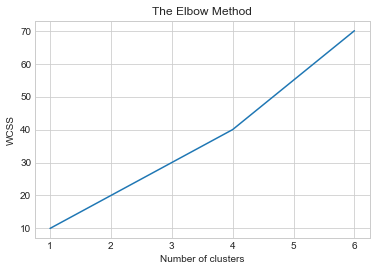

"fig1 = plt.gcf()\nplt.show()\nplt.draw()\nfig1.savefig('tessstttyyy.png', dpi=100)"

In [177]:
plt.plot(x,y)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig(img_buffer,dpi=100)
img_buffer.seek(0)
plt.show()
'''fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('tessstttyyy.png', dpi=100)'''

In [178]:
obj.saveObject('preprocessing_data','K-Means_Elbow.PNG',img_buffer)

['preprocessing-data', 'training-bad-raw-files-validated', 'training-batch-files', 'training-filefromdb', 'training-good-raw-files-validated']
Folder is present
['preprocessing-data', 'training-bad-raw-files-validated', 'training-batch-files', 'training-filefromdb', 'training-good-raw-files-validated']
Folder is present
File Names:  ['K-Means_Elbow.PNG', 'K-Means_Elbow2.PNG']
File Found:  K-Means_Elbow.PNG


In [146]:
plt

<module 'matplotlib.pyplot' from 'c:\\users\\garahul\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [114]:
obj.deleteFile('preprocessing_data','K-Means_Elbow3.PNG')

preprocessing-data
preprocessing-data
Folder Found
['K-Means_Elbow.PNG', 'K-Means_Elbow2.PNG']


In [110]:
obj.isFolderPresent('preprocessing_data')

preprocessing-data
Folder Found


True